## Build the model and apply hyperparameter tuning

# 1. RF for *Flood* Prediction

In [1]:
# Import data set and relevant libraries
import pandas as pd

total_dataset = pd.read_csv('/Users/jan-philippviefhues/Desktop/UNI/Maastricht/um/Thesis/gitRepo/masterthesis/cleaned_data/total_dataset_with_precipitation_and_dummies_hourly.csv')
total_dataset = total_dataset.rename(columns={'PM25':'PM2.5', 'IsFloodingPeriode': 'Is flooding periode','period': 'Periode','RhineWaterLevel':'Rhine water level',
                  'mine_water_level':'Mine water level', 'ground_water_level':'Ground water level','Stream_water_level':'Stream water level','abnormal_Co2_leakage':'CO2 leakage'})

# Flood

# Set features and target
target = 'Is flooding periode' # Can be any kind of data type
features = ['CO2','CO2 leakage','PM2.5', 'PM10', 'Temperature', 'Humidity', 'Pressure', 'Precipitation','Mine water level', 'Ground water level','Rhine water level','Stream water level','Discharge'] # Has to be an array


In [4]:
# Follow literature advice and use 10-fold cross validation to avoid for overfitting


def calculate_rf_model(dataset, target, features, best_parameters):
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.ensemble import RandomForestClassifier
    from pprint import pprint
    from sklearn.model_selection import train_test_split
    import numpy as np


 
   
    X=dataset[features] # Has to be an array]  # Features
    y=dataset[target]  # Labels

    
   
    
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11) # 80% training and 20% test
  
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    


    clf=RandomForestClassifier(n_estimators=best_parameters['n_estimators'],min_samples_split=best_parameters['min_samples_split'],
                               min_samples_leaf=best_parameters['min_samples_leaf'], max_features=best_parameters['max_features'], 
                               max_depth=best_parameters['max_depth'],bootstrap= best_parameters['bootstrap'])
     #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    
    
    # Outcome



    #Outcome
    
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    
    # Calculate Feature Importance
    featue_names = list(X.columns)
    feature_imp = pd.Series(clf.feature_importances_,featue_names).sort_values(ascending=False)
    feature_imp
    %matplotlib inline
    # Creating a bar plot
    sns.barplot(x=feature_imp, y=feature_imp.index)
    # Add labels to your graph
    import matplotlib.pyplot as plt
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title('Visualizing Important Features')
    plt.legend()
    plt.show()
    
    feature_importances = clf.feature_importances_
    sorted_importances = [importance for importance in feature_importances]
    sorted_features = [importance for importance in feature_importances]
    # Cumulative importances
    cumulative_importances = np.cumsum(sorted_importances)
    # Make a line graph
 
    #print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)


    
    # Score gives accuracy
    from sklearn.model_selection import cross_val_score
    #accuracy = cross_val_score(clf, dataset[features], dataset[target], scoring='accuracy', cv = 10).mean() * 100
    
    #print("Accuracy of Random Forests is: " , accuracy)
    # Print confusion matrix
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import recall_score
    
    y_pred = cross_val_predict(clf, dataset[features], dataset[target], cv=10)
    
    
    labels = np.unique(y)
    a =  confusion_matrix(y, y_pred, labels=labels)
    
    print(y_pred)

    print(pd.DataFrame(a, index=labels, columns=labels))
    

    
   # precision, recall and F1
    from sklearn.preprocessing import LabelBinarizer


    lb = LabelBinarizer()
    

    recall = cross_val_score(clf, dataset[features], dataset[target], cv=10, scoring='recall')
    print('Recall', np.mean(recall), recall)
    precision = cross_val_score(clf, dataset[features], dataset[target], cv=10, scoring='precision')
    print('Precision', np.mean(precision), precision)
    f1 = cross_val_score(clf, dataset[features], dataset[target], cv=10, scoring='f1')
    print('F1', np.mean(f1), f1)
    
    
   
    print(y_pred)

In [6]:

best_parameter_for_flood = {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
calculate_rf_model(total_dataset, target, features,best_parameter_for_flood)

### Second interation with 8 features only

No handles with labels found to put in legend.


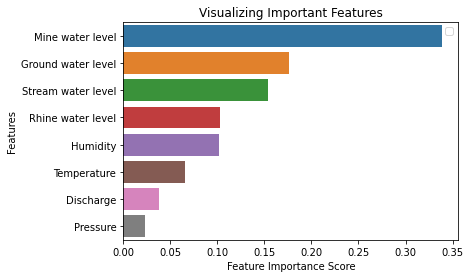

[0 0 0 ... 0 0 0]
      0    1
0  7239  508
1    61  346
Recall 0.8609756097560975 [0.2195122 1.        1.        1.        1.        1.        1.
 1.        1.        0.3902439]
Precision 0.9074545454545454 [1.         1.         1.         1.         1.         1.
 1.         1.         0.07454545 1.        ]
F1 0.7836986160415702 [0.13636364 1.         1.         1.         1.         1.
 1.         1.         0.13921902 0.56140351]
[0 0 0 ... 0 0 0]


In [7]:
# Only 3 most important features
eigth_features = ['Temperature', 'Humidity', 'Pressure','Mine water level', 'Ground water level','Rhine water level','Stream water level','Discharge'] # Has to be an array

best_parameter_for_flood = {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
calculate_rf_model(total_dataset, target, eigth_features,best_parameter_for_flood)


# 2. RF for *CO2 Leakage* Prediction

### BEFORE Data Set

In [8]:
dataset_before = pd.read_csv('/Users/jan-philippviefhues/Desktop/UNI/Maastricht/um/Thesis/data/datasets/cleaned_datasets/hourly_dataset.before.flooding_with_precipitation_and_dummies.csv')
dataset_before = dataset_before.rename(columns={'PM25':'PM2.5', 'IsFloodingPeriode': 'Is flooding periode','period': 'Periode','RhineWaterLevel':'Rhine water level',
                 'mine_water_level':'Mine water level', 'ground_water_level':'Ground water level','Stream_water_level':'Stream water level','abnormal_Co2_leakage':'CO2 leakage'})

best_parameters_for_before_dataset = {'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
target_before = 'CO2 leakage' # Can be any kind of data type
features_before = ['Is flooding periode','PM2.5', 'PM10', 'Temperature', 'Humidity', 'Pressure', 'Precipitation','Mine water level', 'Ground water level','Rhine water level','Stream water level','Discharge'] # Has to be an array


calculate_rf_model(dataset_before, target_before, features_before,best_parameters_for_before_dataset)

### DURING Data Set

In [9]:
dataset_during = pd.read_csv('/Users/jan-philippviefhues/Desktop/UNI/Maastricht/um/Thesis/data/datasets/cleaned_datasets/hourly_dataset.during.flooding_with_precipitation_and_dummies.csv')
dataset_during = dataset_during.rename(columns={'PM25':'PM2.5', 'IsFloodingPeriode': 'Is flooding periode','period': 'Periode','RhineWaterLevel':'Rhine water level',
                  'mine_water_level':'Mine water level', 'ground_water_level':'Ground water level','Stream_water_level':'Stream water level','abnormal_Co2_leakage':'CO2 leakage'})

best_parameters_for_during_dataset = {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True}
target_during = 'CO2 leakage' # Can be any kind of data type
features_during = ['Is flooding periode','PM2.5', 'PM10', 'Temperature', 'Humidity', 'Pressure', 'Precipitation','Mine water level', 'Ground water level','Rhine water level','Stream water level','Discharge'] # Has to be an array
calculate_rf_model(dataset_during, target_during, features_during,best_parameters_for_during_dataset)

### AFTER Data Set

In [10]:
dataset_after = pd.read_csv('/Users/jan-philippviefhues/Desktop/UNI/Maastricht/um/Thesis/data/datasets/cleaned_datasets/hourly_dataset.after.flooding_with_precipitation_and_dummies.csv')
dataset_after = dataset_after.rename(columns={'PM25':'PM2.5', 'IsFloodingPeriode': 'Is flooding periode','period': 'Periode','RhineWaterLevel':'Rhine water level',
                  'mine_water_level':'Mine water level', 'ground_water_level':'Ground water level','Stream_water_level':'Stream water level','abnormal_Co2_leakage':'CO2 leakage'})

best_parameters_for_after_dataset = {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True}
target_after = 'CO2 leakage' # Can be any kind of data type
features_after = ['Is flooding periode','PM2.5', 'PM10', 'Temperature', 'Humidity', 'Pressure', 'Precipitation','Mine water level', 'Ground water level','Rhine water level','Stream water level','Discharge'] # Has to be an array
calculate_rf_model(dataset_after, target_after, features_after,best_parameters_for_after_dataset)

## Optimized model with oversampling for floood prediction

In [3]:
from imblearn.over_sampling import RandomOverSampler



def calculate_rf_model_with_oversampling(dataset, target, features, best_parameters):
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.ensemble import RandomForestClassifier
    from pprint import pprint
    from sklearn.model_selection import train_test_split
    import numpy as np
    import imblearn
    from imblearn.over_sampling import RandomOverSampler
 
    # Apply oversampling
    oversample = RandomOverSampler(sampling_strategy=0.06)
    X_b=dataset[features] # Has to be an array]  # Features
    y_b=dataset[target]  # Labels
    X,y = oversample.fit_resample(X_b, y_b)
    


    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11) # 80% training and 20% test
    
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    

    
    
    

    clf=RandomForestClassifier(n_estimators=best_parameters['n_estimators'],min_samples_split=best_parameters['min_samples_split'],
                               min_samples_leaf=best_parameters['min_samples_leaf'], max_features=best_parameters['max_features'], 
                               max_depth=best_parameters['max_depth'],bootstrap= best_parameters['bootstrap'])
     #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    
    
    # Outcome


    
    #Outcome
    
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    
    # Calculate Feature Importance
    featue_names = list(X.columns)
    feature_imp = pd.Series(clf.feature_importances_,featue_names).sort_values(ascending=False)
    feature_imp
    %matplotlib inline
    # Creating a bar plot
    sns.barplot(x=feature_imp, y=feature_imp.index)
    # Add labels to your graph
    import matplotlib.pyplot as plt
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title('Visualizing Important Features')
    plt.legend()
    plt.show()
    
    feature_importances = clf.feature_importances_
    sorted_importances = [importance for importance in feature_importances]
    sorted_features = [importance for importance in feature_importances]
    # Cumulative importances
    cumulative_importances = np.cumsum(sorted_importances)
    # Make a line graph
 
    #print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)
    print(sorted_features)
        
    
    # Score gives accuracy
    from sklearn.model_selection import cross_val_score
    #accuracy = cross_val_score(clf, dataset[features], dataset[target], scoring='accuracy', cv = 10).mean() * 100
    
    #print("Accuracy of Random Forests is: " , accuracy)
    
    # Print confusion matrix
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import recall_score
    
    #y_pred = cross_val_predict(clf, dataset[features], dataset[target], cv=10)
    y_pred = cross_val_predict(clf, X, y, cv=10)

    
    labels = np.unique(y)
    a =  confusion_matrix(y, y_pred, labels=labels)
    
    print(y_pred)

    print(pd.DataFrame(a, index=labels, columns=labels))
    

    
   # precision, recall and F1
    from sklearn.preprocessing import LabelBinarizer


    lb = LabelBinarizer()
    

    recall = cross_val_score(clf, X, y, cv=10, scoring='recall')
    print('Recall', np.mean(recall), recall)
    precision = cross_val_score(clf, X, y, cv=10, scoring='precision')
    print('Precision', np.mean(precision), precision)
    f1 = cross_val_score(clf, X, y, cv=10, scoring='f1')
    print('F1', np.mean(f1), f1)
    
    
   
    print(y_pred)

No handles with labels found to put in legend.


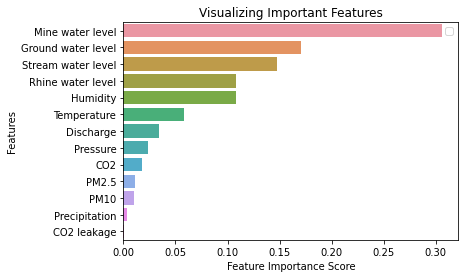

[0.01826076404463384, 0.0006040932571575905, 0.010741209515381238, 0.01046877756495524, 0.057719280513701905, 0.10793935286861753, 0.023819706315232683, 0.0035816725398453656, 0.30641101279666677, 0.1705893116810262, 0.1079695458867518, 0.14762415542689625, 0.03427111758913376]
[0 0 0 ... 1 1 1]
      0    1
0  7239  508
1     3  461
Recall 1.0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Precision 0.908453237410072 [1.         1.         1.         1.         1.         1.
 1.         1.         0.08453237 1.        ]
F1 0.9133890008638066 [0.97826087 1.         1.         1.         1.         1.
 1.         1.         0.15562914 1.        ]
[0 0 0 ... 1 1 1]


In [9]:

best_parameter_for_flood = {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
calculate_rf_model_with_oversampling(total_dataset, target, features,best_parameter_for_flood)

### Sensitivity test: Remove most important features 

No handles with labels found to put in legend.


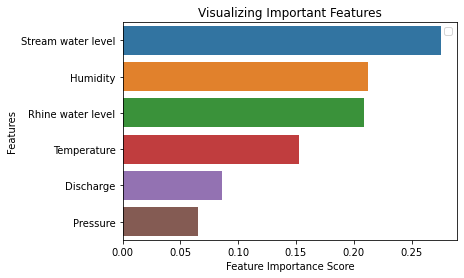

[0.1524749898184857, 0.2121591409346349, 0.06499870330727543, 0.20862747454199543, 0.08592662382308758, 0.2758130675745209]
[0 0 0 ... 1 1 1]
      0    1
0  7204  543
1    72  392
Recall 0.8403792784458833 [0.70212766 1.         0.65217391 0.91304348 1.         0.45652174
 0.95652174 0.72340426 1.         1.        ]
Precision 0.9079931972789115 [1.         1.         1.         1.         1.         1.
 1.         1.         0.07993197 1.        ]
F1 0.8197348018114085 [0.825      1.         0.80519481 0.95454545 1.         0.64705882
 0.97777778 0.83950617 0.14826498 1.        ]
[0 0 0 ... 1 1 1]


In [5]:
# REMOVE 3 most important features
remove_2_features = ['Temperature', 'Humidity', 'Pressure','Rhine water level','Discharge','Stream water level'] # Has to be an array


best_parameter_for_flood = {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
calculate_rf_model_with_oversampling(total_dataset, target, remove_2_features,best_parameter_for_flood)

